# LOGARITMIC REGRESSION

## Hypothesis

Sigmoid Function , $h_\theta (x) = \frac{1}{1+e^{-\theta^Tx}}$ , $p(y=1|_{x;\theta})$

## Cost Function

$J(\theta) = \frac{1}{m} \sum \limits _{i=1} ^{m} Cost(h_\theta(x^{(i)}),y^{(i)})$

$J(\theta) = -\frac{1}{m} [\sum \limits _{i=1} ^{m} y^{(i)}\log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1 -  h_\theta(x^{(i)}))]$

## Goal

$min  J(\theta)$

## Gradient Descent

Repeat {
    $\theta_j := \theta_j - \alpha \frac{1}{m} \sum \limits _{i=1} ^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j ^{(i)} $
}

## Cost Function with regularization

$J(\theta) = -\frac{1}{m} [\sum \limits _{i=1} ^{m} y^{(i)}\log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1 -  h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \sum \limits _{j=1} ^{n}\theta_j^2 $

##  Gradient Descent with regulariztion

Repeat {
    $ [\frac{1}{m} \sum \limits _{i=1} ^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j ^{(i)}] + \frac{\lambda}{m}\theta_j  , where j >= 1$
}

In [1]:
import numpy as np
import sys
sys.path.append ('../src') 
from LogisticRegression import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


### Preparamos los datos y visualizamos

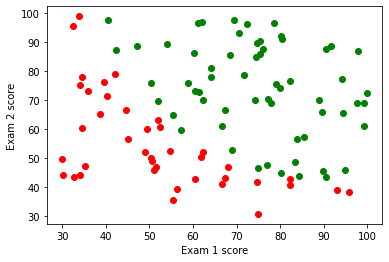

In [2]:
dataset =pd.read_csv('data/ex2data1.txt', sep=',',header=None)  #Exam 1 score, Exam 2 score , Admited (1,0)
mask_approved = dataset.values[:,2] == 1
mask_failed = dataset.values[:,2] == 0
scores_approved = dataset.values [mask_approved,:]
scores_failed = dataset.values [mask_failed,:]

scores_approved_exam1 = scores_approved[:,0:1].reshape (1,scores_approved.shape[0])
scores_approved_exam2 = scores_approved[:,1:2].reshape (1,scores_approved.shape[0])

data_approved = {'a': scores_approved_exam1,
                 'b': scores_approved_exam2
       }

scores_failed_exam1 = scores_failed[:,0:1].reshape (1,scores_failed.shape[0])
scores_failed_exam2 = scores_failed[:,1:2].reshape (1,scores_failed.shape[0])

data_failed = {'a': scores_failed_exam1,
                 'b': scores_failed_exam2
       }

plt.scatter('a', 'b', data=data_approved,color='g')
plt.scatter('a', 'b', data=data_failed,color='r')
                                                       
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [3]:
X = dataset.values[:,0:2]
Y = dataset.values[:,2:3]

experiment_parameters = {'learning_rate' : 0.03 , 'steps':1000 , 'theta_init' : 'random','lambda':0.0, 'mini_batch_size':2**10}
lr1 = LogisticRegression(optimizer='GD',normalization=True,minibatch=False,kargs=experiment_parameters)
lr1.train (X,Y)


LR = 0.03: 100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7717.91it/s]


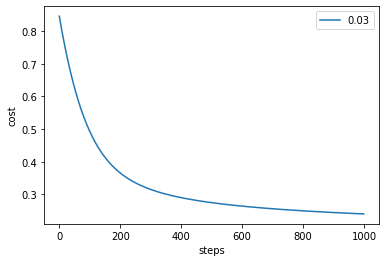

In [4]:
# Plotting costs

steps = np.arange (experiment_parameters['steps'])
plt.plot( steps , lr1.costs,label=str(experiment_parameters['learning_rate']))
plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

## Plotting decission boundary

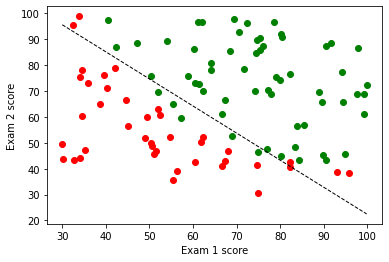

In [5]:
# Plot the data and the classification with the decision boundary. Data is normalized x -x.mean() / x.std ()

b=lr1.vtheta[0,0:1]
w1=lr1.vtheta[0,1:2]
w2=lr1.vtheta[0,2:3]
c = -b/w2
m = -w1/w2

df = pd.DataFrame (lr1.X)
#print (df.describe())
df_min = df.min()
df_max = df.max()
xmin, xmax = df_min[1], df_max[2]
ymin, ymax = df_min[2], df_max[2]
xd = np.array([xmin, xmax])
yd = m*xd + c

# Hay que tener en cuanta la normalización que hemos hecho inicialmente

plt.plot(xd*lr1.X_std[0] + lr1.X_mean[0], yd*lr1.X_std[1] + lr1.X_mean[1], 'k', lw=1, ls='--')

plt.scatter('a', 'b', data=data_approved,color='g')
plt.scatter('a', 'b', data=data_failed,color='r')
                                                       
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

### Regularized Logistic Regression

          0        1  2
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1


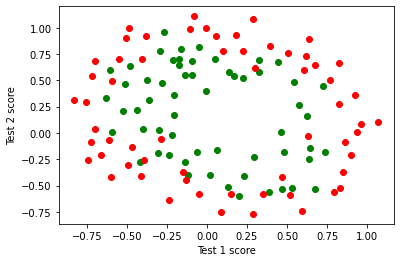

In [7]:
# Leer los datos y visualizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dataset =pd.read_csv('data/ex2data2.txt', sep=',',header=None)  #Test 1 score, Test 2 score , Acepted (1,0)
print (dataset.head())

mask_acepted = dataset.values[:,2] == 1
mask_failed = dataset.values[:,2] == 0
scores_acepted = dataset.values [mask_acepted,:]
scores_failed = dataset.values [mask_failed,:]

scores_acepted_test1 = scores_acepted[:,0:1].reshape (1,scores_acepted.shape[0])
scores_acepted_test2 = scores_acepted[:,1:2].reshape (1,scores_acepted.shape[0])

data_acepted = {'a': scores_acepted_test1,
                 'b': scores_acepted_test2
       }

scores_failed_test1 = scores_failed[:,0:1].reshape (1,scores_failed.shape[0])
scores_failed_test2 = scores_failed[:,1:2].reshape (1,scores_failed.shape[0])

data_failed = {'a': scores_failed_test1,
                 'b': scores_failed_test2
       }

plt.scatter('a', 'b', data=data_acepted , color='g')
plt.scatter('a', 'b', data=data_failed , color='r')
                                                       
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.show()

In [8]:
X_orig = dataset.values[:,0:2]


#Creating new features x= [x1,x2,x1**2,x1*x2,x2**2,x1**3,x1**2 .... ]

degree = 6
X = None
index = 0
for i in range(degree+1):
    for j in  range (i+1):
        new_column =  X_orig[:,0:1]**(i-j) * X_orig[:,1:2]**(j)
        if X is None: 
            X = new_column
        else:
            X = np.concatenate((X,new_column),axis=1)   
        index += 1
X = np.delete (X,0,axis=1)
Y = dataset.values[:,2:3]
print (X.shape)

(118, 27)


In [9]:
experiment_parameters = {'learning_rate' :0.99 , 'steps':15000, 'theta_init' : 'zeros','lambda':0.0, 'mini_batch_size':2**8}
lr1 = LogisticRegression(optimizer='GD',normalization=False,minibatch=False,kargs=experiment_parameters)
lr1.train (X,Y)


LR = 0.99: 100%|███████████████████████████████████████████████████████████████| 15000/15000 [00:01<00:00, 8157.55it/s]


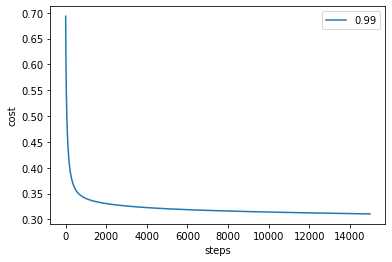

In [10]:


# Plotting costs

steps = np.arange (experiment_parameters['steps'])
plt.plot( steps , lr1.costs,label=str(experiment_parameters['learning_rate']))
plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

In [11]:
# Accuracy
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


prediction = lr1.predict (X)
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0
accuracy = accuracy_score (Y.flatten(),prediction.flatten())
print (accuracy)
print (X.shape)

0.8389830508474576
(118, 27)


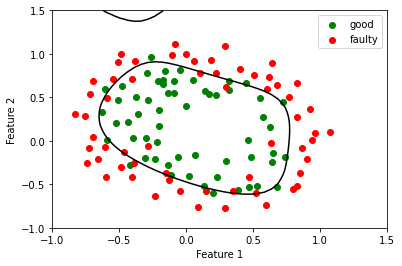

In [12]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res
# define a function to plot the decision boundary
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter('a', 'b', data=data_acepted , color='g')
axes.scatter('a', 'b', data=data_failed , color='r')

degree = 6
plotDecisionBoundary(lr1.vtheta.T, degree, axes)

In [13]:
from sklearn.metrics import accuracy_score
experiment_parameters = {'theta_init':'zeros','lambda':0.0}
lr1 = LogisticRegression(optimizer='Optimize',normalization=False,minibatch=True,kargs=experiment_parameters)
lr1.train (X,Y)
prediction = lr1.predict (X)
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0
accuracy = accuracy_score (Y.flatten(),prediction.flatten())
print (accuracy)

0.8728813559322034


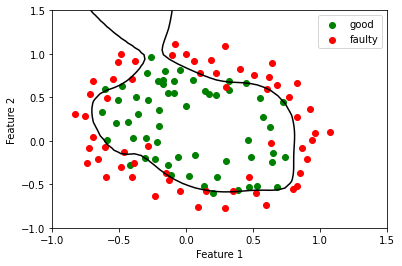

In [13]:
# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter('a', 'b', data=data_acepted , color='g')
axes.scatter('a', 'b', data=data_failed , color='r')

degree = 6
plotDecisionBoundary(lr1.vtheta.T, degree, axes)

In [14]:
from sklearn.linear_model import SGDClassifier

if X.shape[1] == 27:
    X = np.insert (X,0,1,axis=1)
sgd = SGDClassifier(loss='log',max_iter=3000)

sgd.fit (X,Y.ravel())
prediction = sgd.predict (X)
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0
accuracy = accuracy_score (Y.flatten(),prediction.flatten())
print (accuracy)
print (len(sgd.coef_.T))

0.7796610169491526
28


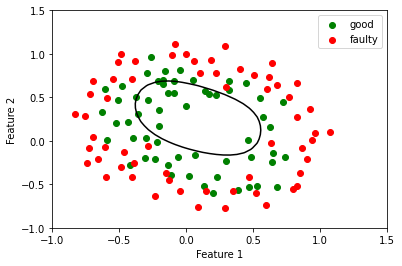

In [15]:
# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter('a', 'b', data=data_acepted , color='g')
axes.scatter('a', 'b', data=data_failed , color='r')

degree = 6
plotDecisionBoundary(sgd.coef_.T, degree, axes)